In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### *1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.*

In [2]:
X = np.array([[1, 1,  500,  1],
              [1, 1,  700,  1],
              [1, 2,  750,  2],
              [1, 5,  600,  1],
              [1, 3,  1450, 2],
              [1, 0,  800,  1],
              [1, 5,  1500, 3],
              [1, 10, 2000, 3],
              [1, 1,  450,  1],
              [1, 2,  1000, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def min_max_scaller(X):
    return (X - X.min()) / (X.max() - X.min())

In [5]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [6]:
X_norm[:, 1] = min_max_scaller(X_norm[:, 1])
X_norm[:, 2] = min_max_scaller(X_norm[:, 2])
X_norm[:, 3] = min_max_scaller(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
n = 50
coeffs = np.zeros((n, X_norm.shape[1]))
alpha_list = np.logspace(-3, 1.2, n)
errors = np.zeros((n, 1))

def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=alpha_list):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for k, val in enumerate(alpha_list):
        for i in range(0, iterations):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
        
            dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
            dReg = val * W # градиент регуляризации
        
            W -= eta * (dQ + dReg)
        
        
            if i % (iterations / 10) == 0:
                print(f'Iter: {i}, weights: {W}, error {err}')
                coeffs[k, :] = W
                errors[k, :] = err
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    #print(val, W)
    return W

In [9]:
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=alpha_list)

Iter: 0, weights: [11.43168418  4.37391264  4.40538041  2.99357234], error 3438.7808349051675
Iter: 500, weights: [44.14246991 20.34739432  3.62649816 14.29069039], error 25.284427398859687
Iter: 1000, weights: [44.22720991 21.55875978  0.71786961 15.82681659], error 24.962300239459744
Iter: 1500, weights: [44.25819241 21.86210052 -0.1669083  16.33547581], error 24.92098145009355
Iter: 2000, weights: [44.2679258  21.95093233 -0.43659115 16.49282088], error 24.91356863459936
Iter: 2500, weights: [44.27090976 21.97781688 -0.51882141 16.54092574], error 24.911789065756874
Iter: 3000, weights: [44.27182057 21.98600373 -0.5438963  16.55560171], error 24.911291056187565
Iter: 3500, weights: [44.27209836 21.9884996  -0.5515426  16.56007738], error 24.911143341787724
Iter: 4000, weights: [44.27218307 21.98926065 -0.55387426 16.56144221], error 24.91109868337218
Iter: 4500, weights: [44.2722089  21.98949272 -0.55458528 16.5618584 ], error 24.91108510109347
Iter: 0, weights: [44.27125081 21.9890

Iter: 2500, weights: [44.1364269  21.01356145  1.30172653 15.74735259], error 25.021579373046876
Iter: 3000, weights: [44.1364169  21.01347153  1.30200196 15.74719138], error 25.02160130922666
Iter: 3500, weights: [44.13641438 21.01344893  1.30207122 15.74715084], error 25.021606824742197
Iter: 4000, weights: [44.13641375 21.01344324  1.30208863 15.74714065], error 25.021608211485184
Iter: 4500, weights: [44.13641359 21.01344181  1.302093   15.74713809], error 25.021608560144685
Iter: 0, weights: [44.13174328 21.01121793  1.30195632 15.74547117], error 25.021608647805525
Iter: 500, weights: [44.10502445 20.81811607  1.62647489 15.62399041], error 25.05812583301418
Iter: 1000, weights: [44.10259256 20.78943421  1.70216054 15.58221515], error 25.065218300520776
Iter: 1500, weights: [44.10195166 20.78337995  1.72018045 15.57177689], error 25.06690105298443
Iter: 2000, weights: [44.10179621 20.78197047  1.72447582 15.56926735], error 25.06730228105397
Iter: 2500, weights: [44.10175902 20.7

Iter: 1500, weights: [43.47907565 17.73065693  6.6487881  13.79101363], error 26.437452080776175
Iter: 2000, weights: [43.4790658  17.73056725  6.64906077 13.79085445], error 26.437521213410747
Iter: 2500, weights: [43.47906504 17.73056047  6.64908153 13.79084231], error 26.437526469000204
Iter: 3000, weights: [43.47906498 17.73055995  6.64908311 13.79084138], error 26.437526868971226
Iter: 3500, weights: [43.47906498 17.73055991  6.64908323 13.79084131], error 26.43752689941661
Iter: 4000, weights: [43.47906498 17.73055991  6.64908324 13.7908413 ], error 26.437526901734152
Iter: 4500, weights: [43.47906498 17.73055991  6.64908324 13.7908413 ], error 26.43752690191058
Iter: 0, weights: [43.45188471 17.71947592  6.64492667 13.78222017], error 26.437526901924002
Iter: 500, weights: [43.32831388 17.25318235  7.29279514 13.62709938], error 26.83739428078689
Iter: 1000, weights: [43.32728522 17.23917976  7.32720401 13.60871889], error 26.847339222097247
Iter: 1500, weights: [43.3272181  17.

Iter: 500, weights: [40.56616597 13.67311419 11.25498355 13.10422349], error 40.049528159524826
Iter: 1000, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.0495366033811
Iter: 1500, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.0495366038527
Iter: 2000, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.04953660385278
Iter: 2500, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.04953660385278
Iter: 3000, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.04953660385278
Iter: 3500, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.04953660385278
Iter: 4000, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.04953660385278
Iter: 4500, weights: [40.5661655  13.67310559 11.25500205 13.1042143 ], error 40.04953660385278
Iter: 0, weights: [40.41634679 13.62260816 11.21343514 13.05581789], error 40.04953660385278
Iter: 500, weights: [39.91087141 13.32290015 

Iter: 1000, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 1500, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 2000, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 2500, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 3000, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 3500, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 4000, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 4500, weights: [30.47446092 10.25036945 10.79566068 11.59029438], error 263.3388518998975
Iter: 0, weights: [29.80954502 10.02671878 10.56011241 11.33740816], error 263.3388518998975
Iter: 500, weights: [28.71419242  9.71256143 10.33916274 11.08692465], error 338.540147757974
Iter: 1000, weights: [28.71419242  9.71256143

Iter: 2000, weights: [13.03339002  4.5543575   5.04692699  5.40366256], error 1557.7264342349927
Iter: 2500, weights: [13.03339002  4.5543575   5.04692699  5.40366256], error 1557.7264342349927
Iter: 3000, weights: [13.03339002  4.5543575   5.04692699  5.40366256], error 1557.7264342349927
Iter: 3500, weights: [13.03339002  4.5543575   5.04692699  5.40366256], error 1557.7264342349927
Iter: 4000, weights: [13.03339002  4.5543575   5.04692699  5.40366256], error 1557.7264342349927
Iter: 4500, weights: [13.03339002  4.5543575   5.04692699  5.40366256], error 1557.7264342349927
Iter: 0, weights: [11.35336152  3.96729224  4.3963686   4.70712029], error 1557.7264342349927
Iter: 500, weights: [11.34336017  3.97229609  4.4103728   4.72241728], error 1749.9694301949366
Iter: 1000, weights: [11.34336017  3.97229609  4.4103728   4.72241728], error 1749.9694301949366
Iter: 1500, weights: [11.34336017  3.97229609  4.4103728   4.72241728], error 1749.9694301949366
Iter: 2000, weights: [11.34336017 

array([6.06842664, 2.13718877, 2.38435778, 2.55363236])

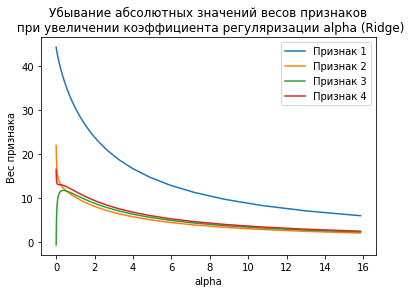

In [10]:
for i in range(X_norm.shape[1]):
    plt.plot(alpha_list, coeffs[:, i], label = f'Признак {i+1}')
    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
#plt.xticks(np.arange(0, 10, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend();

#### *2. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.*

In [25]:
n = 50
coeffs = np.zeros((n, X_norm.shape[1]))
alpha_list = np.logspace(-3, 1.2, n)
errors = np.zeros((n, 1))

def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=alpha_list):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for k, val in enumerate(alpha_list):
        for i in range(0, iterations):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
        
            dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
            dReg = (W / np.sqrt(W**2)) * val # градиент регуляризации
            #print(dReg)
        
            W -= eta * (dQ + dReg)
        
        
            if i % (iterations / 10) == 0:
                print(f'Iter: {i}, weights: {W}, error {err}')
                coeffs[k, :] = W
                errors[k, :] = err
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    #print(val, W)
    return W

In [26]:
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=alpha_list)

Iter: 0, weights: [10.44483736  2.61538421  5.63180661  7.1181879 ], error 3335.64713937126
Iter: 500, weights: [44.18753908 20.34975845  3.31855477 14.5206612 ], error 25.24067309143362
Iter: 1000, weights: [44.2620234  21.78773254  0.28412897 16.01255215], error 24.938202008758076
Iter: 1500, weights: [44.2928441  22.11829313 -0.64742686 16.5436645 ], error 24.90862011685082
Iter: 2000, weights: [44.30340673 22.21567128 -0.94133796 16.71478604], error 24.905266645473684
Iter: 2500, weights: [44.30682308 22.24650839 -1.0355566  16.76988314], error 24.904796989601767
Iter: 3000, weights: [44.30792015 22.25637273 -1.06576344 16.78756154], error 24.904708644589086
Iter: 3500, weights: [44.30827198 22.25953405 -1.07544806 16.79323024], error 24.904686716747428
Iter: 4000, weights: [44.30838479 22.26054752 -1.07855305 16.79504773], error 24.904680343924984
Iter: 4500, weights: [44.30842096 22.26087245 -1.07954855 16.79563045], error 24.904678368308755
Iter: 0, weights: [44.30841073 22.2609

Iter: 2000, weights: [44.29743821 22.14455735 -0.79014092 16.63962662], error 24.906655538117672
Iter: 2500, weights: [44.29742194 22.1444111  -0.78969301 16.63936447], error 24.906660698465693
Iter: 3000, weights: [44.29741672 22.14436422 -0.7895494  16.63928041], error 24.906662354311447
Iter: 3500, weights: [44.29741505 22.1443492  -0.78950336 16.63925346], error 24.906662885337617
Iter: 4000, weights: [44.29741451 22.14434438 -0.7894886  16.63924482], error 24.90666305560547
Iter: 4500, weights: [44.29741434 22.14434283 -0.78948386 16.63924205], error 24.90666311019682
Iter: 0, weights: [44.29728538 22.14421344 -0.78935345 16.63911226], error 24.906663127699623
Iter: 500, weights: [44.29537848 22.12198171 -0.73755423 16.61215619], error 24.90731908436948
Iter: 1000, weights: [44.29480128 22.1162653  -0.72098746 16.60265519], error 24.907543691617676
Iter: 1500, weights: [44.29460984 22.11451448 -0.71567867 16.59955916], error 24.907617421020024
Iter: 2000, weights: [44.29454809 22.

Iter: 3500, weights: [ 4.42747952e+01  2.17831400e+01 -2.75772579e-03  1.62172642e+01], error 24.927103430143916
Iter: 4000, weights: [ 4.42749872e+01  2.17832388e+01 -3.78788819e-03  1.62173969e+01], error 24.927081734700977
Iter: 4500, weights: [4.42749616e+01 2.17832577e+01 8.03268528e-04 1.62174303e+01], error 24.927074367668073
Iter: 0, weights: [4.42745744e+01 2.17827537e+01 4.06381648e-04 1.62169663e+01], error 24.92704965505186
Iter: 500, weights: [4.42798588e+01 2.17548396e+01 1.37218805e-03 1.62184152e+01], error 24.927795014077965
Iter: 1000, weights: [ 4.42799517e+01  2.17536216e+01 -3.72189101e-03  1.62191782e+01], error 24.927803900974336
Iter: 1500, weights: [ 4.42799022e+01  2.17535271e+01 -1.84123617e-03  1.62191940e+01], error 24.927808033296536
Iter: 2000, weights: [4.42800391e+01 2.17535223e+01 5.10485501e-05 1.62191770e+01], error 24.927811700302087
Iter: 2500, weights: [4.42798525e+01 2.17534565e+01 1.86117475e-03 1.62190978e+01], error 24.927821984395994
Iter: 30

Iter: 0, weights: [ 4.43586119e+01  2.12560592e+01 -2.33300840e-04  1.62464717e+01], error 24.960944348695165
Iter: 500, weights: [4.43844688e+01 2.11210403e+01 1.23348243e-02 1.62540569e+01], error 24.976773428422625
Iter: 1000, weights: [ 4.43867632e+01  2.11161398e+01 -3.37862080e-03  1.62591227e+01], error 24.978621907821562
Iter: 1500, weights: [4.43849701e+01 2.11148529e+01 1.22170783e-02 1.62580818e+01], error 24.977068716623176
Iter: 2000, weights: [ 4.43869641e+01  2.11157051e+01 -3.76218891e-03  1.62592221e+01], error 24.97870051398323
Iter: 2500, weights: [4.43849776e+01 2.11148859e+01 1.20613993e-02 1.62581833e+01], error 24.977063033781633
Iter: 3000, weights: [ 4.43869954e+01  2.11157548e+01 -3.96163839e-03  1.62592980e+01], error 24.978697840328234
Iter: 3500, weights: [4.43851218e+01 2.11148632e+01 1.17910445e-02 1.62581283e+01], error 24.977084838958476
Iter: 4000, weights: [ 4.43870005e+01  2.11158034e+01 -4.10019091e-03  1.62593764e+01], error 24.97869188700297
Iter:

Iter: 500, weights: [4.49062404e+01 1.80560785e+01 6.10569956e-03 1.64391520e+01], error 26.15595718914161
Iter: 1000, weights: [44.89479257 18.02123148  0.11197317 16.44907748], error 26.097598203906166
Iter: 1500, weights: [44.89673645 18.0202945   0.06108999 16.45106784], error 26.140385030497516
Iter: 2000, weights: [4.49065302e+01 1.80246969e+01 1.45034152e-02 1.64569870e+01], error 26.160517749885734
Iter: 2500, weights: [44.89822971 18.02156751  0.12321179 16.45311509], error 26.07909620040565
Iter: 3000, weights: [44.8955925  18.01872771  0.06748775 16.44894474], error 26.139735480684255
Iter: 3500, weights: [4.49051777e+01 1.80232375e+01 2.12730631e-02 1.64548680e+01], error 26.159653398419675
Iter: 4000, weights: [44.90384862 18.02474745  0.13591783 16.45744753], error 26.054230784453
Iter: 4500, weights: [44.89439071 18.01884966  0.07624206 16.44929527], error 26.132690101148473
Iter: 0, weights: [4.48855381e+01 1.80045199e+01 1.05495003e-02 1.64358780e+01], error 26.1571180

Iter: 500, weights: [47.97300735  0.24196219  0.15661558 16.91204283], error 65.78761403748555
Iter: 1000, weights: [47.88015819  0.4516061   0.26811761 16.85418743], error 64.99611993367384
Iter: 1500, weights: [47.79259604  0.67072959  0.38978614 16.81807366], error 63.92779410827502
Iter: 2000, weights: [4.79303160e+01 3.02340073e-02 6.57150849e-01 1.69461562e+01], error 64.32346585587595
Iter: 2500, weights: [47.93765162  0.21308753  0.77222289 16.90005095], error 62.88548392372635
Iter: 3000, weights: [47.98184202  0.4306649   0.93147479 16.91579666], error 65.69698156540969
Iter: 3500, weights: [47.86107996  0.66948718  0.09361828 16.88827335], error 64.6421455236468
Iter: 4000, weights: [47.92068034  0.93043515  0.27727721 16.93242301], error 61.45818529370173
Iter: 4500, weights: [47.93703711  0.13555543  0.38887378 16.88838767], error 65.51737829630746
Iter: 0, weights: [47.7706943   0.20460648  0.38712105 16.73354406], error 64.67309385230097
Iter: 500, weights: [ 4.81690465e

array([47.19526232,  1.35904454,  1.10401654,  0.67667064])

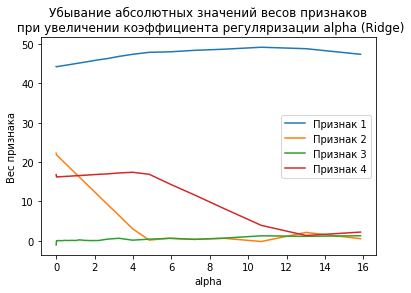

In [15]:
for i in range(X_norm.shape[1]):
    plt.plot(alpha_list, coeffs[:, i], label = f'Признак {i+1}')
    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
#plt.xticks(np.arange(0, 10, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend();

#### *3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?*